In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#importing the dataset
dataset = pd.read_csv(r'C:\Users\User\Downloads\german_credit_data.csv')

dataset.head(8)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good


### Explore the Data

In [3]:
# Making a copy of the original data to analyze
df = dataset.copy()

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Observations

1. 1000 data entries (X,y)
2. 10 columns
3. Categorical: Sex, Housing, Saving Accounts, Checking Account, Purpose, Risk
4. Numerical : Age, Job, Credit Amount, Duration
5. Target Value: Risk
6. Columns with Null Values: Saving Accounts, Checking Account
7. Applicants have at most 3 jobs
8. Duration is between 4 to 72 months

In [7]:
df_num = df[['Age','Job','Credit amount','Duration']]
df_cat = df[['Sex','Housing','Saving accounts','Checking account','Purpose']]

#### The distribution of Risk among Numerical Variables

In [8]:
pd.pivot_table(df, index = 'Risk', values = df_num)

,Age,Credit amount,Duration,Job
Risk,,,,
bad,33.963333,3938.126667,24.860000,1.936667
good,36.224286,2985.457143,19.207143,1.890000


#### Observations

1. The average age of good applicants is higher than bad applicants
2. The average credit amount of good applicants is less than bad applicants
3. The average duration of good applicants is less than bad applicants
4. The average number of jobs is nearly the same for good and bad applicants

#### The distribution of applicants with good credit rate among categorical variables

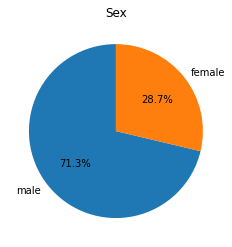

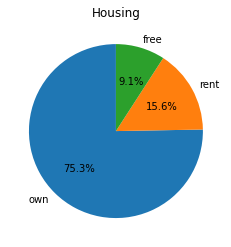

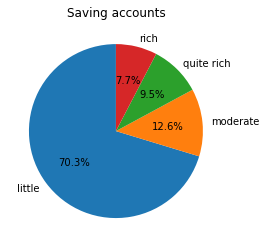

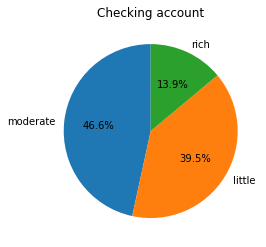

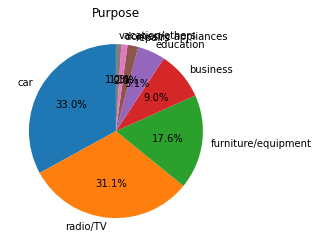

In [9]:
for i in df_cat:
    classLabel = df.loc[df.Risk == 'good'][i].value_counts(normalize=True).index
    plt.pie(df.loc[df.Risk == 'good'][i].value_counts(normalize=True),
            labels = classLabel, startangle=90, autopct='%.1f%%')
    plt.title(i)
    plt.show()

#### Observations

Among the applicants with good risk

1. In terms of Sex :
   71% male, 29% female
2. In terms of Housing :
   75% own , 16% rent , 9% free
3. In terms of Saving Accounts :
   70% little
4. In terms of Checking Account:
   47% moderate
5. In terms of Purpose :
   33% car , 31% radio,TV

C:\Users\User\AppData\Local\Temp/ipykernel_4752/4285305128.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


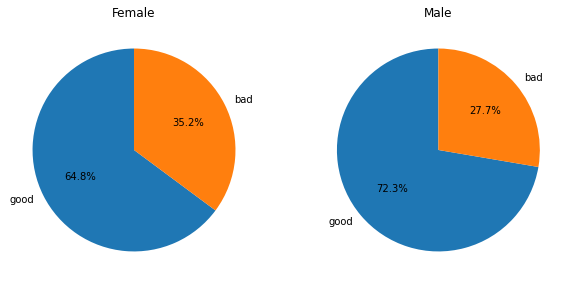

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ser = df.loc[df.Sex == 'female']["Risk"].value_counts(normalize = True)
ax1.pie(ser,labels = ser.index, startangle=90, autopct='%.1f%%')
ax1.set_title('Female')
ser2 = df.loc[df.Sex == 'male']["Risk"].value_counts(normalize = True)
ax2.pie(ser2,labels = ser2.index, startangle=90, autopct='%.1f%%')
ax2.set_title('Male')
fig.show()

C:\Users\User\AppData\Local\Temp/ipykernel_4752/3768126420.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


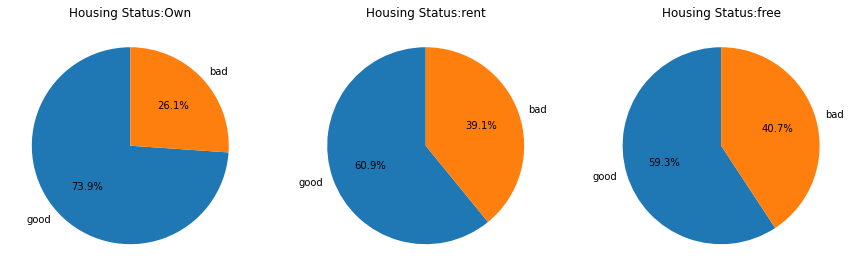

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
ser = df.loc[df.Housing == 'own']["Risk"].value_counts(normalize = True)
ser2 = df.loc[df.Housing == 'rent']["Risk"].value_counts(normalize = True)
ser3 = df.loc[df.Housing == 'free']["Risk"].value_counts(normalize = True)

ax1.pie(ser,labels = ser.index, startangle=90, autopct='%.1f%%')
ax1.set_title('Housing Status:Own')
ax2.pie(ser2,labels = ser2.index, startangle=90, autopct='%.1f%%')
ax2.set_title('Housing Status:rent')
ax3.pie(ser3,labels = ser3.index, startangle=90, autopct='%.1f%%')
ax3.set_title('Housing Status:free')
fig.show()


C:\Users\User\AppData\Local\Temp/ipykernel_4752/1787777806.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


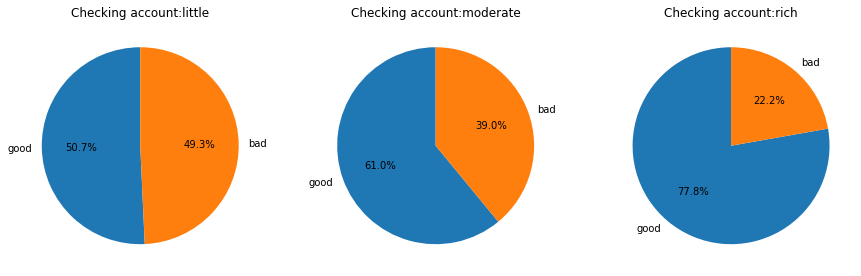

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,15))
ser = df.loc[df["Checking account"] == 'little']["Risk"].value_counts(normalize = True)
ser2 = df.loc[df["Checking account"] == 'moderate']["Risk"].value_counts(normalize = True)
ser3 = df.loc[df["Checking account"] == 'rich']["Risk"].value_counts(normalize = True)

ax1.pie(ser,labels = ser.index, startangle=90, autopct='%.1f%%')
ax1.set_title('Checking account:little')
ax2.pie(ser2,labels = ser2.index, startangle=90, autopct='%.1f%%')
ax2.set_title('Checking account:moderate')
ax3.pie(ser3,labels = ser3.index, startangle=90, autopct='%.1f%%')
ax3.set_title('Checking account:rich')
fig.show()

C:\Users\User\AppData\Local\Temp/ipykernel_4752/546589661.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


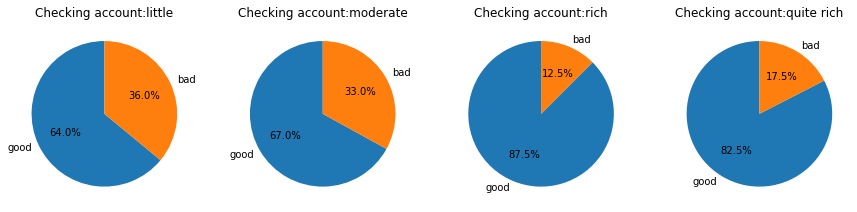

In [13]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,15))
ser = df.loc[df["Saving accounts"] == 'little']["Risk"].value_counts(normalize = True)
ser2 = df.loc[df["Saving accounts"] == 'moderate']["Risk"].value_counts(normalize = True)
ser3 = df.loc[df["Saving accounts"] == 'rich']["Risk"].value_counts(normalize = True)
ser4 = df.loc[df["Saving accounts"] == 'quite rich']["Risk"].value_counts(normalize = True)

ax1.pie(ser,labels = ser.index, startangle=90, autopct='%.1f%%')
ax1.set_title('Checking account:little')
ax2.pie(ser2,labels = ser2.index, startangle=90, autopct='%.1f%%')
ax2.set_title('Checking account:moderate')
ax3.pie(ser3,labels = ser3.index, startangle=90, autopct='%.1f%%')
ax3.set_title('Checking account:rich')
ax4.pie(ser4,labels = ser4.index, startangle=90, autopct='%.1f%%')
ax4.set_title('Checking account:quite rich')
fig.show()

In [14]:
for i in df.Purpose.unique():
        ser = df.loc[df["Purpose"] == i]["Risk"].value_counts(normalize = True)
        print('applicants with Purpose: ',i)
        print("%.2f" % (ser[1]*100),'% bad')
        print("%.2f" % (ser[0]*100),'% good')

applicants with Purpose:  radio/TV
22.14 % bad
77.86 % good
applicants with Purpose:  education
38.98 % bad
61.02 % good
applicants with Purpose:  furniture/equipment
32.04 % bad
67.96 % good
applicants with Purpose:  car
31.45 % bad
68.55 % good
applicants with Purpose:  business
35.05 % bad
64.95 % good
applicants with Purpose:  domestic appliances
33.33 % bad
66.67 % good
applicants with Purpose:  repairs
36.36 % bad
63.64 % good
applicants with Purpose:  vacation/others
41.67 % bad
58.33 % good


#### Observations

1. The percentage of male applicants who rated as good is higher than female ones
2. Applicants with their own house rated as good 14% more than applicants on rent or free
3. In terms of checking account rich has 17% more chance than moderate and moderate has 10% more chance than little
4. The chance of getting good applicant in terms of saving accounts: little = 64% moderate = 67% rich = 87% quite rich = 82%
5. The chance of getting good credit risk in terms of purpose is as follows:
   radio/TV > car > furniture/equipment > domestic appliances > business > repairs > education > vacation

#### Histogram of attributes

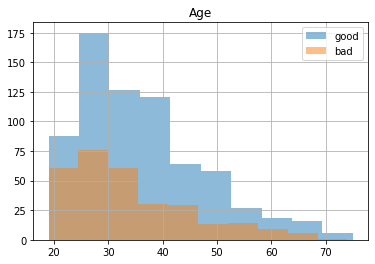

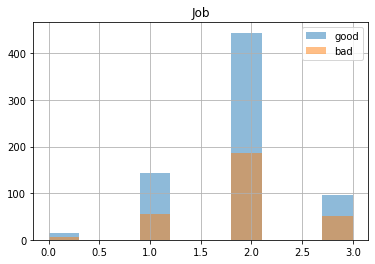

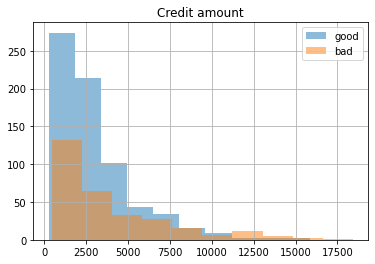

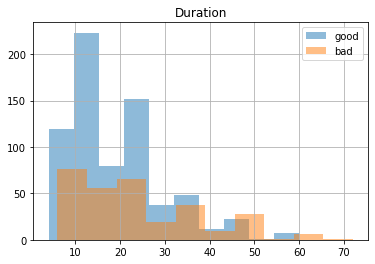

In [15]:
good = df.loc[df['Risk'] == 'good']
bad = df.loc[df['Risk'] == 'bad']
for i in df_num:
    good[i].hist(alpha = 0.5,label='good')
    bad[i].hist(alpha = 0.5,label='bad')
    plt.title(i)
    plt.legend(['good','bad'])
    plt.show()

#### Observations

The chance of good credit risk is;
1. higher for younger applicants
2. nearly the same for people with different number of jobs
3. decreases as the credit amount increases
4. decreases as the credit duration increases

In [16]:
for i in df_cat:
    if(i != 'Purpose'):
        print(pd.pivot_table(df, index = 'Risk',values= 'Purpose', columns = i,aggfunc = 'count'))

Sex   female  male
Risk              
bad      109   191
good     201   499
Housing  free  own  rent
Risk                    
bad        44  186    70
good       64  527   109
Saving accounts  little  moderate  quite rich  rich
Risk                                               
bad                 217        34          11     6
good                386        69          52    42
Checking account  little  moderate  rich
Risk                                    
bad                  135       105    14
good                 139       164    49


#### Correlations

                    Age       Job  Credit amount  Duration
Age            1.000000  0.015673       0.032716 -0.036136
Job            0.015673  1.000000       0.285385  0.210910
Credit amount  0.032716  0.285385       1.000000  0.624984
Duration      -0.036136  0.210910       0.624984  1.000000


<AxesSubplot:>

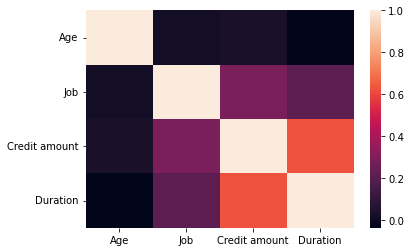

In [17]:
print(df_num.corr())
sns.heatmap(df_num.corr())

#### Observation

Credit amount and duration is highly corelated

### Prepare the Data

#### Missing Values

1. As we observed before we have null values in just 2 categories which are Saving Account and Checking account. This values may    indicate that these person doesnt have saving or checking account or they may be just a missing value.
2. Therefore i wanted to treat the missing values as another categorical value.

In [18]:
dataset.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [19]:
dataset['Checking account'].fillna("No Info", inplace = True) 
dataset['Saving accounts'].fillna("No Info", inplace = True) 

Splitting train and test data I wanted to keep the ratio of good and bad risk applicant same in both train and test data To do so i decided to use stratified shuffle split.

#### Split data into training and test set

1. I wanted to keep the ratio of good and bad applicants same for both sets
2. Therefore i made stratified train test split

In [20]:
# The ratio of good and bad applicants
dataset['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [21]:
# set dependent and independent values
y = dataset['Risk']
X = dataset.drop('Risk',axis = 1)

In [22]:
# Split train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
y_train.value_counts()

good    560
bad     240
Name: Risk, dtype: int64

The ratio of good and bad applicants is the same for both sets

#### Feature Scaling and Pipeline Formation

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = ['Age','Job','Credit amount','Duration']
cat_attribs = ['Sex','Housing','Saving accounts','Checking account','Purpose']

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ("encoding", OneHotEncoder())
    ])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ])

In [25]:
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Model Selection

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#### Logistic Regression

In [28]:
lr = LogisticRegression(random_state = 42)
y_pred_lr = cross_val_predict(lr,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_lr))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_lr))

Accuracy score: 0.73125
Confusion Matrix
[[ 88 152]
 [ 63 497]]


#### K-Nearest Neighbors

In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)
y_pred_knn = cross_val_predict(knn,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_knn))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_knn))

Accuracy score: 0.7025
Confusion Matrix
[[ 81 159]
 [ 79 481]]


#### Decision Tree Classification

In [30]:
dt = DecisionTreeClassifier(max_depth = 5,random_state = 42)
y_pred_dt = cross_val_predict(dt,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_dt))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_dt))

Accuracy score: 0.71375
Confusion Matrix
[[ 76 164]
 [ 65 495]]


####  Random Forest

In [31]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
y_pred_rf = cross_val_predict(rf,X_train,y_train,cv = 5)
print('Accuracy score:',accuracy_score(y_train, y_pred_rf))
print('Confusion Matrix')
print(confusion_matrix(y_train, y_pred_rf))

Accuracy score: 0.70375
Confusion Matrix
[[114 126]
 [111 449]]


### Conclusion

Logistic Regression has the highest accuracy score, followed by Decision Tree Classifier.
Therefore, Logistic Regression yields the best result.